In [2]:
from manim import *

Manim Community v0.10.0

In [3]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

In [4]:
%%manim -qm -v WARNING ExampleRotation


class ExampleRotation(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        m1a = Square().set_color(RED).shift(LEFT)
        m1b = Circle().set_color(RED).shift(LEFT)
        m2a= Square().set_color(BLUE).shift(RIGHT)
        m2b= Circle().set_color(BLUE).shift(RIGHT)

        points = m2a.points
        points = np.roll(points, int(len(points)/4), axis=0)
        m2a.points = points

        self.play(Transform(m1a,m1b),Transform(m2a,m2b), run_time=1)

In [5]:
%%manim -qm -v WARNING MovingGroupToDestination

class MovingGroupToDestination(Scene):
    def construct(self):
        group = VGroup(Dot(LEFT), Dot(ORIGIN), Dot(RIGHT, color=RED), Dot(2 * RIGHT)).scale(1.4)
        dest = Dot([4, 3, 0], color=YELLOW)
        self.add(group, dest)
        self.play(group.animate.shift(dest.get_center() - group[2].get_center()))
        self.wait(0.5)

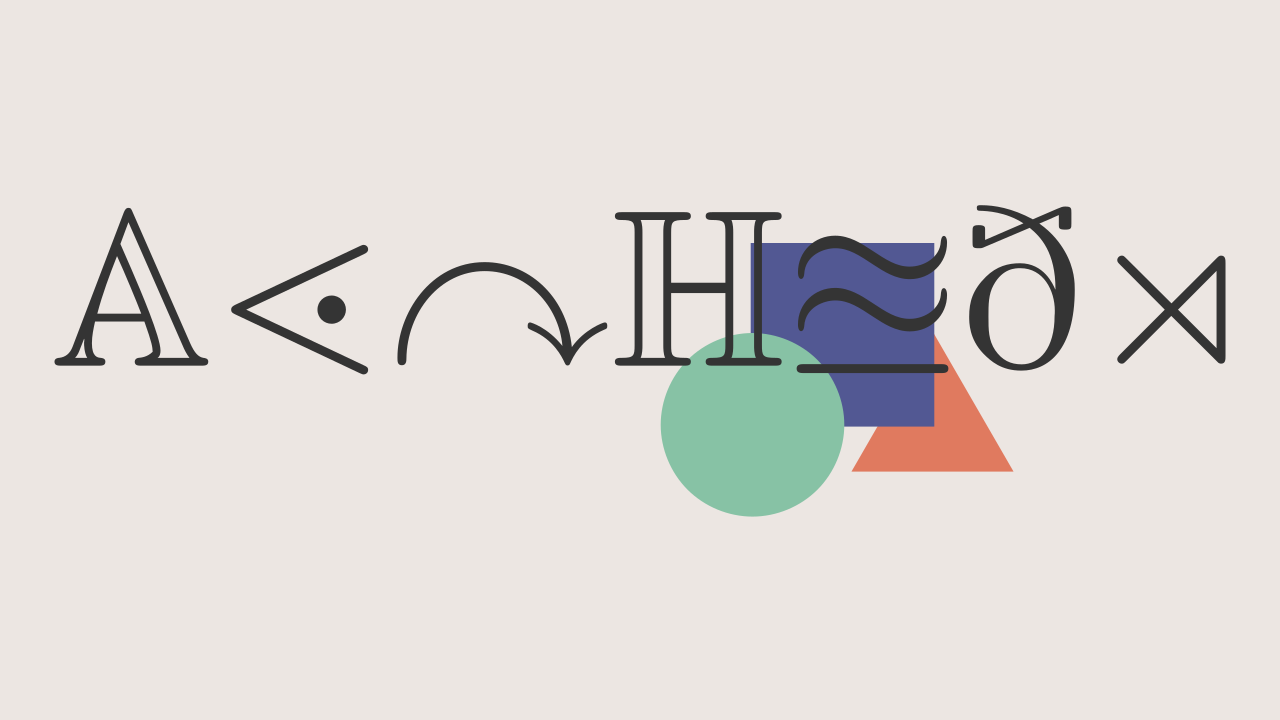

In [6]:
%%manim -qm -v WARNING ManimCELogo

class ManimCELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{Ale y Hugo}", fill_color=logo_black).scale(5)
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        self.add(logo)

In [7]:
%%manim -qm -v WARNING SineCurveUnitCircle

class SineCurveUnitCircle(Scene):
    # contributed by heejin_park, https://infograph.tistory.com/230
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)

In [8]:
%%manim -i -qh -o func_example FunctionExample
import numpy as np

class FunctionExample(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-5, 5, .5],
            y_range=[-3, 4, 1],
            x_axis_config={"numbers_to_include": [-4, -3, 3, 4]},
            y_axis_config={"numbers_to_include": [-2, 2, 3]},
            tips=True
        )
        axes_labels=axes.get_axis_labels()
        # Get the graph of a simple functions
        graph = axes.get_graph(lambda x: np.sin(1/x), color=RED)
        # Set up its label
        graph_label = axes.get_graph_label(
            graph, x_val=1, direction=2 * UP + RIGHT,
           label=r'f(x) = \sin(\frac{1}{x})', color=DARK_BLUE
        )

        # Graph the axes components together
        axes_group = VGroup(axes, axes_labels)
        
        # Animate
        self.play(Create(axes_group), run_time=2)
        self.wait(0.25)
        self.play(Create(graph), run_time=3)
        self.play(Write(graph_label), run_time=2)

[09/12/21 14:27:48] WARNING  --save_as_gif is deprecated, please use           ]8;id=13639;file:///usr/local/lib/python3.8/site-packages/manim/cli/render/commands.py\commands.py]8;;\:62
                             --format=gif instead!

                    INFO     Writing "-" to                            ]8;id=517460;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/6fdc8994b887759a.tex

                    INFO     Writing "4" to                            ]8;id=95484;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/3d03f1e61f74f6b3.tex

                    INFO     Writing "." to                            ]8;id=450779;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/630958bbd56f8775.tex

                    INFO     Writing "0" to                            ]8;id=159565;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/ce14bce8a4b9ddee.tex

[09/12/21 14:27:49] INFO     Writing "3" to                            ]8;id=793501;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/636fcc1c0070bb50.tex

                    INFO     Writing "2" to                            ]8;id=152305;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d9294a8d6b301b15.tex

                    INFO     Writing "x" to                            ]8;id=982232;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/049324c46070fc62.tex

                    INFO     Writing "y" to                            ]8;id=557709;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/40dc4ae30d7b31c4.tex

                    INFO     Writing "f(x) = \sin(\frac{1}{x})" to     ]8;id=165457;file:///usr/local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/2d15fb7d3c6e698b.tex

[09/12/21 14:27:53] INFO     Animation 0 : Partial movie file        ]8;id=121288;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:422
                             written in '/manim/media/videos/manim/1                         
                             080p60/partial_movie_files/FunctionExam                         
                             ple/450974505_1958144121_1240453128.mp4                         
                             '

                    INFO     Animation 1 : Partial movie file        ]8;id=25375;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:422
                             written in '/manim/media/videos/manim/1                         
                             080p60/partial_movie_files/FunctionExam                         
                             ple/34786186_3422167888_3496585481.mp4'

[09/12/21 14:27:59] INFO     Animation 2 : Partial movie file        ]8;id=324961;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:422
                             written in '/manim/media/videos/manim/1                         
                             080p60/partial_movie_files/FunctionExam                         
                             ple/34786186_1350809673_3995373208.mp4'

[09/12/21 14:28:02] INFO     Animation 3 : Partial movie file        ]8;id=537499;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:422
                             written in '/manim/media/videos/manim/1                         
                             080p60/partial_movie_files/FunctionExam                         
                             ple/34786186_3721655712_1954308567.mp4'

[09/12/21 14:28:05] INFO                                             ]8;id=29655;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:606
                             File ready at '/manim/media/videos/mani                         
                             m/1080p60/func_example.gif'

                    INFO     Rendered FunctionExample                            ]8;id=156103;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:233
                             Played 4 animations

In [10]:
%%manim -qh -o threeDexample ThreeDSurface

class ThreeDSurface(ThreeDScene):
    def construct(self):
        res = 30
        self.set_camera_orientation(phi=50*DEGREES, theta=-30*DEGREES)
        
        def ripple(u, v):
            x = u
            y = v
            z = np.sin(10*(x**2 + y**2)) / 10
            return np.array([x, y, z])
        
        ripple_plane = ParametricSurface(
            ripple, resolution=(res, res),
            v_range=[-3, 3],
            u_range=[-3, 3],
            checkerboard_colors=None
        )
        # Set up the ripple plane
        ripple_plane.scale_about_point(1.5, ORIGIN)
        ripple_plane.set_style(fill_opacity=.5, stroke_color=ORANGE)
        # Create 3D axes
        axes = ThreeDAxes()
        # Animate
        self.add(axes)
        self.play(GrowFromCenter(ripple_plane), run_time=3)
        # Rotate around the Z axis for 20 seconds
        self.begin_ambient_camera_rotation()
        self.wait(20)
        self.stop_ambient_camera_rotation()

[09/12/21 14:29:11] WARNING  The class ParametricSurface has been          ]8;id=421058;file:///usr/local/lib/python3.8/site-packages/manim/utils/deprecation.py\deprecation.py]8;;\:208
                             deprecated since v0.10.0 and may be removed                     
                             in a later version. Use <class                                  
                             'manim.mobject.three_dimensions.Surface'>                       
                             instead.

[09/12/21 14:30:16] INFO     Animation 0 : Partial movie file        ]8;id=226937;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:422
                             written in '/manim/media/videos/manim/1                         
                             080p60/partial_movie_files/ThreeDSurfac                         
                             e/854701121_2373908292_3653184515.mp4'

[09/12/21 14:39:36] INFO     Animation 1 : Partial movie file        ]8;id=649536;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:422
                             written in '/manim/media/videos/manim/1                         
                             080p60/partial_movie_files/ThreeDSurfac                         
                             e/941318652_1759436698_772769661.mp4'

                    INFO                                             ]8;id=955713;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:606
                             File ready at '/manim/media/videos/mani                         
                             m/1080p60/threeDexample.mp4'

                    INFO     Rendered ThreeDSurface                              ]8;id=16500;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:233
                             Played 2 animations